In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
stocks = ['AAPL', 'FB', 'NFLX', 'AMZN', 'GOOG']
indices = ['DJI', 'GSPC']

market_dfs = {}
for symbol in stocks + indices:
    market_dfs[symbol] = pd.read_csv(symbol + '.csv')

In [111]:
def plot_prices(symbols, dfs, standardize=False):
    # Figsize
    plt.figure(figsize=(10,6))
    
    # Plot each stock's price
    for symbol in symbols: 
        prices = dfs[symbol].Close / np.mean(dfs[symbol].Close) if standardize else dfs[symbol].Close
        plt.plot(prices)
        date = dfs[symbol].Date
        
    # Plot config
    locs, _ = plt.xticks()
    plt.xticks(locs[1:-1], date[0:-1:len(date)//(len(locs)-3)])
    plt.gca().legend(symbols)
    plt.title("Standardized Price over Time" if standardize else "Price over Time")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.show()

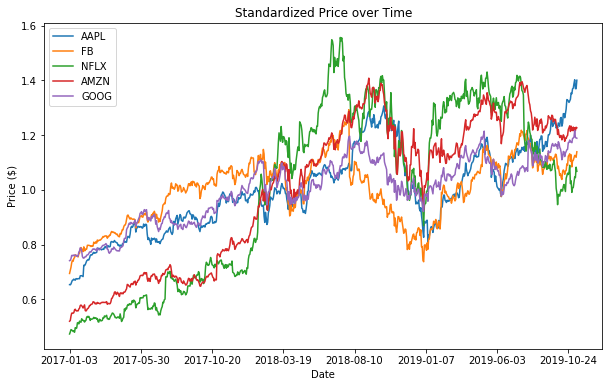

In [112]:
plot_prices(stocks, market_dfs, standardize=True)

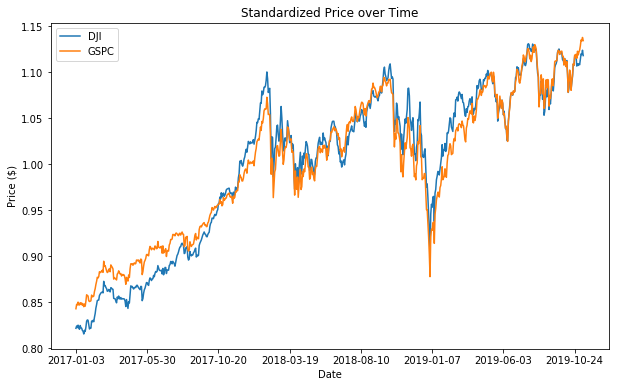

In [113]:
plot_prices(indices, market_dfs, standardize=True)

In [100]:
df_2019 = pd.read_csv('nytimes_2019.csv')
df_2017_18 = pd.read_csv('nytimes_2017_2018.csv')

df = pd.concat([df_2017_18, df_2019], ignore_index=True)

In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.columns

Index(['web_url', 'snippet', 'lead_paragraph', 'abstract', 'print_page',
       'source', 'headline', 'headline_kicker', 'headline_content_kicker',
       'headline_print_headline', 'headline_name', 'headline_seo',
       'headline_sub', 'keywords', 'pub_date', 'document_type', 'news_desk',
       'section_name', 'byline', 'type_of_material', 'word_count'],
      dtype='object')

In [27]:
# percentage of each column that's missing
print(df.isna().sum() / len(df))

# view unique values in each column
df['headline_kicker'].unique()

web_url                    0.000063
snippet                    0.000567
lead_paragraph             0.000851
abstract                   0.000473
print_page                 0.341855
source                     0.000000
headline                   0.000000
headline_kicker            0.866316
headline_content_kicker    1.000000
headline_print_headline    0.240260
headline_name              1.000000
headline_seo               1.000000
headline_sub               1.000000
keywords                   0.000000
pub_date                   0.000000
document_type              0.000000
news_desk                  0.053965
section_name               0.000000
byline                     0.000000
type_of_material           0.016234
word_count                 0.000000
dtype: float64


array([nan, 'Corner Office', 'Fair Game', 'Sinosphere', 'Wheels',
       'Prototype', 'The Week Ahead', 'Memo From Britain',
       'Breakingviews', 'What in the World', 'White Collar Watch',
       'Itineraries', 'Obituary', 'Entrepreneurship', 'News Analysis',
       'Advertising', 'Economic Scene', 'Goiânia Journal',
       'Yadua Island Journal', 'Off the Shelf', 'Banda Aceh Journal',
       'The Saturday Profile', 'The Interpreter', 'Lecce Journal',
       'Warsaw Journal', 'Common Sense', 'IHT Retrospective',
       "Yan'an Journal", 'DealBook', 'Your Money Adviser',
       'Fundamentally', 'Bangkok Journal', 'Memo From China',
       'Square Feet', 'The Workologist', 'Deal Professor',
       'Burnley Journal', 'Romford Journal', 'Live', 'Another View',
       'Bucharest Journal', 'Saulx-les-Chartreux Journal', 'Mediator',
       'Retiring', 'Adventures in Capitalism', 'United Nations Memo',
       "Reporter's Notebook", 'Street Scene', 'Beirut Journal',
       'Datang Journal', 

In [29]:
df['abstract']

0        Thousands of people gathered on the streets of...
1        A bright and upbeat music video of Saudi women...
2        On Sunday, Turkish officials revealed latest i...
3        The head of the Roman Catholic Church expresse...
4        Prime Minister Benjamin Netanyahu of Israel ca...
5        Cédric Herrou from the Roya Valley near the It...
6        Prime Minister Narendra Modi of India spoke on...
7        A bomb killed dozens of people outside a court...
8        A photographer who became the Earl of Snowdon ...
9        Attorney General Loretta E. Lynch says Volkswa...
10       A Palestinian man drove a truck through a grou...
11       Sgt. Elor Azaria was found guilty over the dea...
12       China's foreign ministry on Tuesday dismissed ...
13       News of a shooting that killed and injured sco...
14       In Bekaa Valley, Lebanon, hundreds of Syrian r...
15       The Teleférico in La Paz is one of the longest...
16       Thinking about asking for a raise, or changing.

In [ ]:
# import sys
# !{sys.executable} -m pip install textblob

from textblob import TextBlob

df['abstract'].apply(lambda x: TextBlob(str(x)).sentiment)

array([nan, 'Corner Office', 'Fair Game', 'Sinosphere', 'Wheels',
       'Prototype', 'The Week Ahead', 'Memo From Britain',
       'Breakingviews', 'What in the World', 'White Collar Watch',
       'Itineraries', 'Obituary', 'Entrepreneurship', 'News Analysis',
       'Advertising', 'Economic Scene', 'Goiânia Journal',
       'Yadua Island Journal', 'Off the Shelf', 'Banda Aceh Journal',
       'The Saturday Profile', 'The Interpreter', 'Lecce Journal',
       'Warsaw Journal', 'Common Sense', 'IHT Retrospective',
       "Yan'an Journal", 'DealBook', 'Your Money Adviser',
       'Fundamentally', 'Bangkok Journal', 'Memo From China',
       'Square Feet', 'The Workologist', 'Deal Professor',
       'Burnley Journal', 'Romford Journal', 'Live', 'Another View',
       'Bucharest Journal', 'Saulx-les-Chartreux Journal', 'Mediator',
       'Retiring', 'Adventures in Capitalism', 'United Nations Memo',
       "Reporter's Notebook", 'Street Scene', 'Beirut Journal',
       'Datang Journal', 